# Goal of challenge

Classification task: predict whether a DNA sequence region is binding site to a specific transcription factor.

Transcription factors (TFs) are regulatory proteins that bind specific sequence motifs in the genome to activate or repress transcription of target genes. Genome-wide protein-DNA binding maps can be profiled using some experimental techniques and thus all genomics can be classified into two classes for a TF of interest: <u>bound or unbound</u>(binary classification task). In this challenge, we will work with three datasets corresponding to <u>three different TFs</u>.

# Loading Data

In [1]:
import pandas as pd

In [2]:
X_tr_0=pd.read_csv('Xtr0.csv')
X_tr_1=pd.read_csv('Xtr1.csv')
X_tr_2=pd.read_csv('Xtr2.csv')

In [3]:
X_tr_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Id     2000 non-null int64
seq    2000 non-null object
dtypes: int64(1), object(1)
memory usage: 31.3+ KB


In [4]:
X_tr_0.head()

,Id,seq
0,0,GGAGAATCATTTGAACCCGGGAGGTGGAGGTTGCCGTGAGCTGAGA...
1,1,ACCCTGCCTACACCGCGGCGGGGACAGGTGGAGGTTTCAACCCCTG...
2,2,TGCAAATCTGTAAGCATTTCTCAGGCAATGAATTATGTCAACACAA...
3,3,GCGGGACGTGGGCGTCGAGGGTAAGGATATCTGCAGAAGTACTGTC...
4,4,GGAGAATAGCATGTATCCGAGAGGTGGAGCTGGCAGTGAGCCGAGA...


In [5]:
X_mat_col=['n'+str(i) for i in range(100)]

In [6]:
X_tr_0_mat=pd.read_csv('Xtr0_mat100.csv',
                       sep=" ",
                       header=None,
                       names=X_mat_col)
X_tr_1_mat=pd.read_csv('Xtr1_mat100.csv',
                       sep=" ",
                       header=None,
                       names=X_mat_col)
X_tr_2_mat=pd.read_csv('Xtr2_mat100.csv',
                       sep=" ",
                       header=None,
                       names=X_mat_col)

In [7]:
X_tr_0_mat.shape

(2000, 100)

In [8]:
X_tr_0_mat.head()

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n90,n91,n92,n93,n94,n95,n96,n97,n98,n99
0,0.00000,0.021739,0.010870,0.021739,0.000000,0.00000,0.01087,0.00000,0.01087,0.0,...,0.010870,0.000000,0.000000,0.000000,0.01087,0.021739,0.0,0.000000,0.00000,0.000000
1,0.01087,0.010870,0.021739,0.021739,0.021739,0.01087,0.00000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.021739,0.01087,0.043478,0.0,0.010870,0.01087,0.000000
2,0.01087,0.021739,0.000000,0.021739,0.021739,0.01087,0.01087,0.00000,0.01087,0.0,...,0.021739,0.021739,0.010870,0.000000,0.01087,0.021739,0.0,0.021739,0.01087,0.021739
3,0.00000,0.021739,0.000000,0.010870,0.043478,0.00000,0.01087,0.01087,0.01087,0.0,...,0.010870,0.032609,0.021739,0.010870,0.01087,0.032609,0.0,0.021739,0.01087,0.010870
4,0.00000,0.021739,0.021739,0.000000,0.021739,0.00000,0.01087,0.00000,0.00000,0.0,...,0.010870,0.010870,0.000000,0.000000,0.01087,0.032609,0.0,0.000000,0.00000,0.000000


In [9]:
y_tr_0=pd.read_csv('Ytr0.csv')
y_tr_1=pd.read_csv('Ytr1.csv')
y_tr_2=pd.read_csv('Ytr2.csv')

In [10]:
y_tr_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Id       2000 non-null int64
Bound    2000 non-null int64
dtypes: int64(2)
memory usage: 31.3 KB


In [11]:
y_tr_0.head()

,Id,Bound
0,0,0
1,1,1
2,2,1
3,3,0
4,4,1


In [12]:
y_tr_0['Bound']=y_tr_0['Bound'].apply(lambda x: -1 if x==0 else x)
y_tr_1['Bound']=y_tr_1['Bound'].apply(lambda x: -1 if x==0 else x)
y_tr_2['Bound']=y_tr_2['Bound'].apply(lambda x: -1 if x==0 else x)

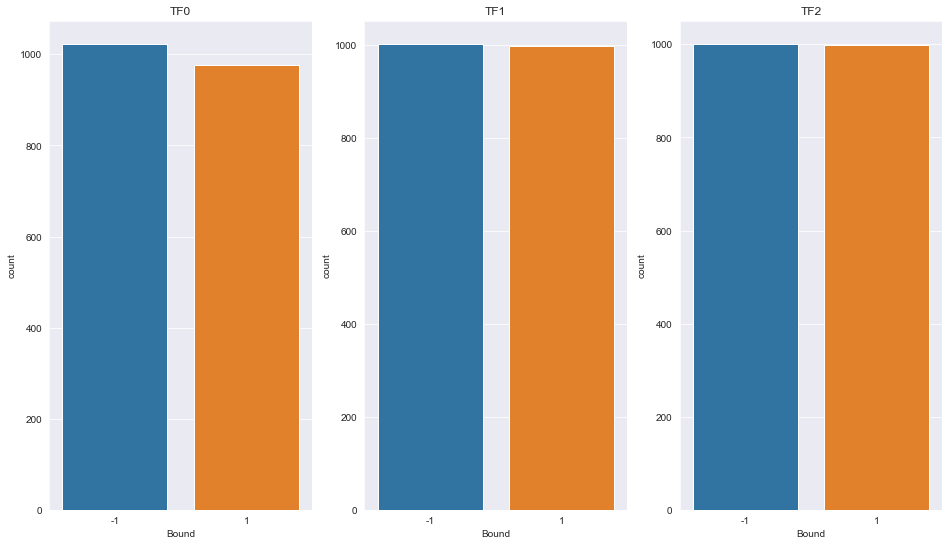

In [13]:
% matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("darkgrid")
color=sns.color_palette()
plt.figure(figsize=(16,9))

plt.subplot(131)
sns.countplot(y_tr_0['Bound'])
plt.title('TF0')

plt.subplot(132)
sns.countplot(y_tr_1['Bound'])
plt.title('TF1')

plt.subplot(133)
sns.countplot(y_tr_2['Bound'])
plt.title('TF2')
plt.show()

In [14]:
X_te_0=pd.read_csv('Xte0.csv')
X_te_1=pd.read_csv('Xte1.csv')
X_te_2=pd.read_csv('Xte2.csv')
X_te_0_mat=pd.read_csv('Xte0_mat100.csv',
                       sep=" " ,
                       header=None,
                       names=X_mat_col)
X_te_1_mat=pd.read_csv('Xte1_mat100.csv',
                       sep=" ",
                       header=None,
                       names=X_mat_col)
X_te_2_mat=pd.read_csv('Xte2_mat100.csv',
                       sep=" ", 
                       header=None,
                       names=X_mat_col)

# Starting with matrices

## Splitting data

In [15]:
import numpy as np
def split(X,y,test_ratio):
    np.random.seed(42)
    shuffled_ind=np.random.permutation(len(X))
    test_size=int(len(X)*test_ratio)
    train_ind=shuffled_ind[test_size:]
    test_ind=shuffled_ind[:test_size]
    return(X.iloc[train_ind],X.iloc[test_ind],y.iloc[train_ind],y.iloc[test_ind])

### TF0

In [16]:
X_subtr_0_mat,X_val_0_mat,y_subtr_0,y_val_0=split(X_tr_0_mat,y_tr_0,0.2)

### TF1

In [17]:
X_subtr_1_mat,X_val_1_mat,y_subtr_1,y_val_1=split(X_tr_1_mat,y_tr_1,0.2)

### TF2

In [18]:
X_subtr_2_mat,X_val_2_mat,y_subtr_2,y_val_2=split(X_tr_2_mat,y_tr_2,0.2)

## Testing SVM model: rbf kernel

### TF0

In [19]:
from svm import svm
my_model=svm()

In [21]:
my_model.fit(X_subtr_0_mat,y_subtr_0['Bound'])
my_y_pred=my_model.predict(X_val_0_mat)
y_val_0_test=y_val_0.reset_index(drop=True)
print('acc val 0:',np.mean(my_y_pred==y_val_0_test['Bound']))
my_y_train=my_model.predict(X_subtr_0_mat)
y_subtr_0_test=y_subtr_0.reset_index(drop=True)
print('acc tr 0:',np.mean(my_y_train==y_subtr_0_test['Bound']))

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:06<00:00, 58.94it/s]


acc val 0: 0.4825


100%|██████████████████████████████████████████████████████████████████████████████| 1600/1600 [00:27<00:00, 58.11it/s]


acc tr 0: 0.51875


In [22]:
np.shape(my_model.alpha)

(1600, 1)

In [23]:
pd.Series(my_y_train).value_counts()

-1    1600
dtype: int64

### TF1

In [24]:
my_model.fit(X_subtr_1_mat,y_subtr_1['Bound'])
my_y_pred=my_model.predict(X_val_1_mat)
y_val_1_test=y_val_1.reset_index(drop=True)
print('acc val 1:',np.mean(my_y_pred==y_val_1_test['Bound']))
my_y_train=my_model.predict(X_subtr_1_mat)
y_subtr_1_test=y_subtr_1.reset_index(drop=True)
print('acc tr 1:',np.mean(my_y_train==y_subtr_1_test['Bound']))

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:06<00:00, 58.89it/s]


acc val 1: 0.475


100%|██████████████████████████████████████████████████████████████████████████████| 1600/1600 [00:29<00:00, 54.29it/s]


acc tr 1: 0.5075


### TF2

In [25]:
my_model.fit(X_subtr_2_mat,y_subtr_2['Bound'])
my_y_pred=my_model.predict(X_val_2_mat)
y_val_2_test=y_val_2.reset_index(drop=True)
print('acc val 2:',np.mean(my_y_pred==y_val_2_test['Bound']))
my_y_train=my_model.predict(X_subtr_2_mat)
y_subtr_2_test=y_subtr_2.reset_index(drop=True)
print('acc tr 2:',np.mean(my_y_train==y_subtr_2_test['Bound']))

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:07<00:00, 55.55it/s]


acc val 2: 0.475


100%|██████████████████████████████████████████████████████████████████████████████| 1600/1600 [00:31<00:00, 48.31it/s]


acc tr 2: 0.506875


# Grid search

### TF0

In [26]:
svm_gs_0=my_model.grid_search(params={'ld':np.logspace(-3,0,num=10).tolist(),'sigma':[0.1,0.2]},
            X=X_subtr_0_mat,
            y=y_subtr_0['Bound'],
            cv=3)

100%|████████████████████████████████████████████████████████████████████████████████| 534/534 [00:06<00:00, 82.49it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 533/533 [00:07<00:00, 73.93it/s]


In [27]:
gs_df=svm_gs_0[1]

In [28]:
gs_df

,ld,sigma,score_mean,score_var
0,0.001000,0.1,0.571257,0.000234
1,0.001000,0.2,0.546233,0.001711
2,0.002154,0.1,0.544993,0.001589
3,0.002154,0.2,0.524367,0.000764
4,0.004642,0.1,0.521242,0.000641
5,0.004642,0.2,0.518742,0.000546
6,0.010000,0.1,0.521868,0.000671
7,0.010000,0.2,0.518742,0.000546
8,0.021544,0.1,0.521868,0.000671
9,0.021544,0.2,0.518742,0.000546


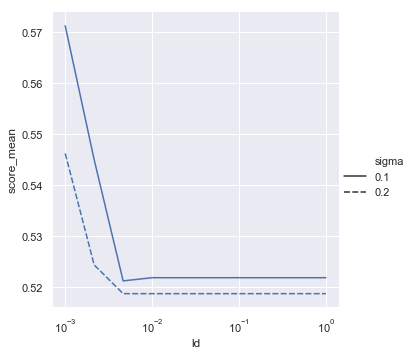

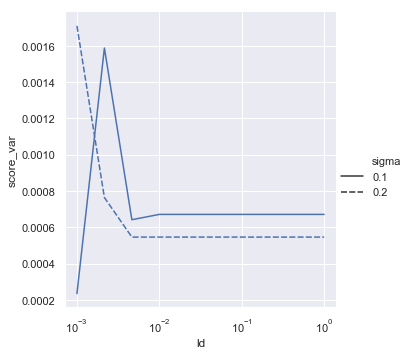

In [29]:
import seaborn as sns
sns.set(style="darkgrid")
sns.relplot(x="ld", y="score_mean", data=gs_df, style='sigma', kind='line')
plt.xscale('log')
sns.relplot(x="ld", y="score_var", data=gs_df, style='sigma', kind='line')
plt.xscale('log')

In [30]:
svm_gs_0 = svm_gs_0[0]

In [31]:
svm_gs_0

{'ld': 0.001, 'sigma': 0.1, 'top_score': 0.5712570824930375}

In [32]:
my_svm_gs_0=svm(kernel='rbf',ld=1e-3,sigma=0.1)
my_svm_gs_0.fit(X_subtr_0_mat,y_subtr_0['Bound'])
my_y_pred=my_svm_gs_0.predict(X_val_0_mat)
y_val_0_test=y_val_0.reset_index(drop=True)
print('acc val 0 gs:',np.mean(my_y_pred==y_val_0_test['Bound']))

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:06<00:00, 61.29it/s]


acc val 0 gs: 0.575


In [33]:
my_y_train=my_svm_gs_0.predict(X_subtr_0_mat)
y_subtr_0_test=y_subtr_0.reset_index(drop=True)
print('acc tr 0 gs:',np.mean(my_y_train==y_subtr_0_test['Bound']))

100%|██████████████████████████████████████████████████████████████████████████████| 1600/1600 [00:27<00:00, 58.93it/s]


acc tr 0 gs: 0.69375


### TF1

In [34]:
svm_gs_1=my_model.grid_search(params={'ld':[1e-4,1e-3,1e-2],'sigma':[0.1,1]},
            X=X_subtr_1_mat,
            y=y_subtr_1['Bound'],
                    cv=3)

100%|████████████████████████████████████████████████████████████████████████████████| 533/533 [00:06<00:00, 84.35it/s]


In [35]:
gs_1=svm_gs_1[1]
svm_gs_1=svm_gs_1[0]

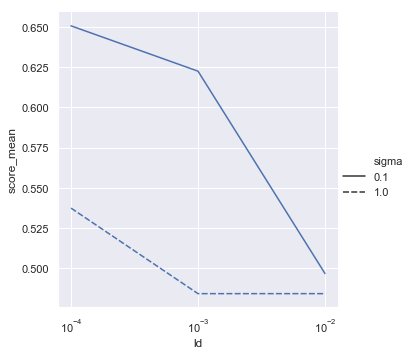

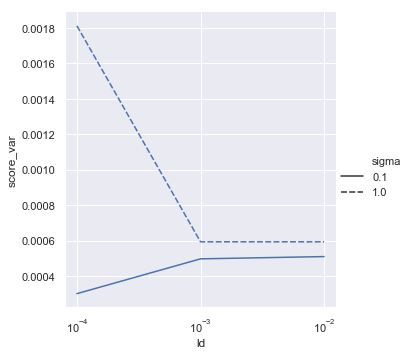

In [36]:
sns.relplot(x="ld", y="score_mean", data=gs_1, style='sigma', kind='line')
plt.xscale('log')
sns.relplot(x="ld", y="score_var", data=gs_1, style='sigma', kind='line')
plt.xscale('log')

In [37]:
svm_gs_1

{'ld': 0.0001, 'sigma': 0.1, 'top_score': 0.6506383905671381}

SVM model with lambda = 1e-4 has the best accuracy but the worst variance, we will, then, take instead lambda = 1e-3

In [38]:
my_svm_gs_1=svm(kernel='rbf',ld=1e-3,sigma=0.1)
my_svm_gs_1.fit(X_subtr_1_mat,y_subtr_1['Bound'])
my_y_pred=my_svm_gs_1.predict(X_val_1_mat)
y_val_1_test=y_val_1.reset_index(drop=True)
print(np.mean(my_y_pred==y_val_1_test['Bound']))

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:06<00:00, 58.69it/s]


0.6425


In [39]:
my_y_train=my_svm_gs_1.predict(X_subtr_1_mat)
y_subtr_1_test=y_subtr_1.reset_index(drop=True)
print(np.mean(my_y_train==y_subtr_1_test['Bound']))

100%|██████████████████████████████████████████████████████████████████████████████| 1600/1600 [00:26<00:00, 61.44it/s]


0.729375


### TF2

In [40]:
svm_gs_2=my_model.grid_search(params={'ld':[1e-4,1e-3,1e-2],'sigma':[0.1,1,10]},
            X=X_subtr_2_mat,
            y=y_subtr_2['Bound'],
                    cv=3)

100%|████████████████████████████████████████████████████████████████████████████████| 533/533 [00:05<00:00, 96.13it/s]


In [41]:
gs_2=svm_gs_2[1]
svm_gs_2=svm_gs_2[0]

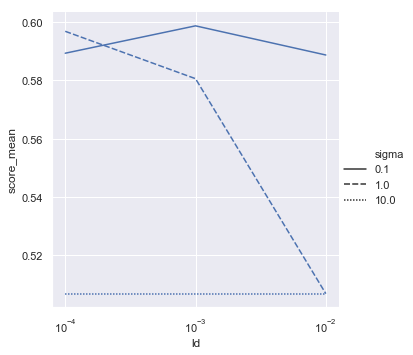

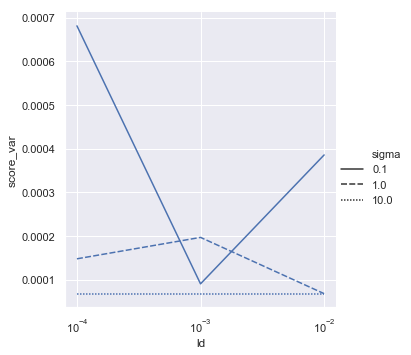

In [42]:
sns.relplot(x="ld", y="score_mean", data=gs_2, style='sigma', kind='line')
plt.xscale('log')
sns.relplot(x="ld", y="score_var", data=gs_2, style='sigma', kind='line')
plt.xscale('log')

In [43]:
svm_gs_2

{'ld': 0.001, 'sigma': 0.1, 'top_score': 0.5987450021431934}

In [44]:
my_svm_gs_2=svm(kernel='rbf',ld=1e-3,sigma=0.1)
my_svm_gs_2.fit(X_subtr_2_mat,y_subtr_2['Bound'])
my_y_pred=my_svm_gs_2.predict(X_val_2_mat)
y_val_2_test=y_val_2.reset_index(drop=True)
print('acc val 2 gs:',np.mean(my_y_pred==y_val_2_test['Bound']))

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:05<00:00, 72.10it/s]


acc val 2 gs: 0.6025


In [45]:
my_y_train=my_svm_gs_2.predict(X_subtr_2_mat)
y_subtr_2_test=y_subtr_2.reset_index(drop=True)
print('acc tr 2 gs:',np.mean(my_y_train==y_subtr_2_test['Bound']))

100%|██████████████████████████████████████████████████████████████████████████████| 1600/1600 [00:22<00:00, 71.13it/s]


acc tr 2 gs: 0.675


## Submissions - SVM - rbf (matrix)

### TF0

In [46]:
#all training samples
my_svm_gs = svm(kernel='rbf',ld=1e-3,sigma=0.1)
my_svm_gs.fit(X_tr_0_mat,y_tr_0['Bound'])
y_te_0_mat = my_svm_gs.predict(X_te_0_mat)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 49.15it/s]


In [47]:
y_te_0_mat_df=pd.DataFrame(y_te_0_mat,columns=['Bound'])
y_te_0_mat_df.insert(loc=0,column='Id',value=X_tr_0['Id'])

### TF1

In [48]:
#all training samples
my_svm_gs.fit(X_tr_1_mat,y_tr_1['Bound'])
y_te_1_mat = my_svm_gs.predict(X_te_1_mat)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.98it/s]


In [49]:
y_te_1_mat_df=pd.DataFrame(y_te_1_mat,columns=['Bound'])
y_te_1_mat_df.insert(loc=0,column='Id',value=X_tr_1['Id']-1000)

### TF2 

In [50]:
#all training samples
my_svm_gs.fit(X_tr_2_mat,y_tr_2['Bound'])
y_te_2_mat = my_svm_gs.predict(X_te_2_mat)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.41it/s]


In [51]:
y_te_2_mat_df=pd.DataFrame(y_te_2_mat,columns=['Bound'])
y_te_2_mat_df.insert(loc=0,column='Id',value=X_tr_1['Id'])

In [52]:
y_te_mat_df=pd.concat([y_te_0_mat_df,y_te_1_mat_df,y_te_2_mat_df])
y_te_mat_df['Bound'][y_te_mat_df['Bound']==-1]=0

In [53]:
y_te_mat_df.to_csv('y_svm_mat_alltr.csv',index=False)

First Submission (with 80% of training set): Accuracy 0.62133

Second submission (with all training set): 0.63133

# KLR

In [54]:
from KLR import KLR

In [56]:
model_KLR= KLR(ld=0.1,sigma=0.1)
model_KLR.fit(X_subtr_0_mat,y_subtr_0['Bound'])
my_y_pred_KLR=model_KLR.predict(X_val_0_mat)
np.mean(my_y_pred_KLR==y_val_0['Bound'].reset_index(drop=True))

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:07<00:00, 52.78it/s]


0.4825

### grid search KLR TF0

In [57]:
KLR_gs_0=model_KLR.grid_search(params={'ld':np.logspace(-1,0,num=10).tolist(),'sigma':[0.1,1]},
            X=X_subtr_0_mat,
            y=y_subtr_0['Bound'],
            cv=3)


100%|████████████████████████████████████████████████████████████████████████████████| 534/534 [00:05<00:00, 98.67it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 533/533 [00:06<00:00, 88.17it/s]


In [58]:
KLR_gs_0_df=KLR_gs_0[1]
KLR_gs_0=KLR_gs_0[0]

In [59]:
KLR_gs_0

{'ld': 0.774263682681127, 'sigma': 0.1, 'top_score': 0.521867599834166}

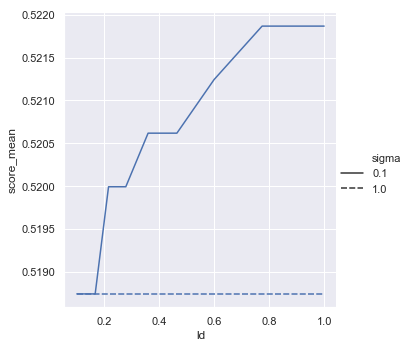

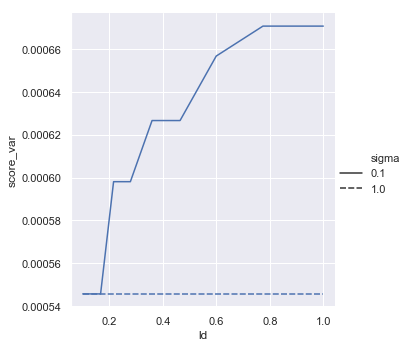

In [60]:
import seaborn as sns
sns.set(style="darkgrid")
sns.relplot(x="ld", y="score_mean", data=KLR_gs_0_df, style='sigma', kind='line')
sns.relplot(x="ld", y="score_var", data=KLR_gs_0_df, style='sigma', kind='line')

In [61]:
my_klr_gs_0 = KLR(kernel = 'rbf', ld = 0.1, sigma = 0.1)
my_klr_gs_0.fit(X_subtr_0_mat, y_subtr_0['Bound'])
y_pred_klr_0 = my_klr_gs_0.predict(X_subtr_0_mat)
print('acc tr 0 (KLR):',np.mean(y_pred_klr_0 == y_subtr_0['Bound'].reset_index(drop = True)))
y_val_klr_0 = my_klr_gs_0.predict(X_val_0_mat)
print('acc val 0 (KLR):',np.mean(y_val_klr_0 == y_val_0['Bound'].reset_index(drop = True)))

100%|██████████████████████████████████████████████████████████████████████████████| 1600/1600 [00:26<00:00, 59.88it/s]


acc tr 0 (KLR): 0.519375


100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:06<00:00, 57.46it/s]


acc val 0 (KLR): 0.4825


## Grid Search KLR TF1

In [72]:
KLR_gs_1=model_KLR.grid_search(params={'kernel':['rbf'],'ld':[0.1,1,10],'sigma':[1e-3,1e-2,0.1]},
            X=X_subtr_1_mat,
            y=y_subtr_1['Bound'],
            cv=3)

100%|█████████████████████████████████████████████████████████████████████████████| 1067/1067 [00:05<00:00, 181.61it/s]


In [73]:
KLR_gs_1_df=KLR_gs_1[1]
KLR_gs_1=KLR_gs_1[0]

In [74]:
KLR_gs_1

{'kernel': 'rbf', 'ld': 0.1, 'sigma': 0.01, 'top_score': 0.6156352401899127}

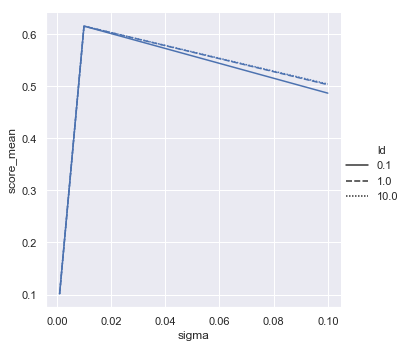

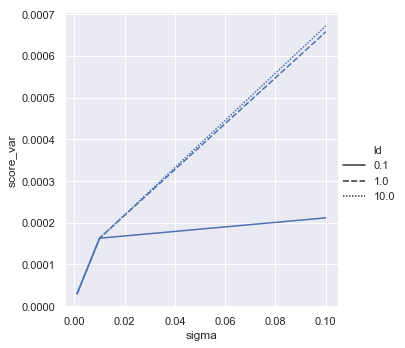

In [75]:
sns.set(style="darkgrid")
sns.relplot(x="sigma", y="score_mean", data=KLR_gs_1_df, style='ld', kind='line')
sns.relplot(x="sigma", y="score_var", data=KLR_gs_1_df, style='ld', kind='line')

In [35]:
my_klr_gs_1 = KLR(kernel = 'rbf', ld = 0.1, sigma = 0.1)
my_klr_gs_1.fit(X_subtr_1_mat, y_subtr_1['Bound'])
y_pred_klr_1 = my_klr_gs_1.predict(X_subtr_1_mat)
print('acc tr 1 (KLR):',np.mean(y_pred_klr_1 == y_subtr_1['Bound'].reset_index(drop = True)))
y_val_klr_1 = my_klr_gs_1.predict(X_val_1_mat)
print('acc val 1 (KLR):',np.mean(y_val_klr_1 == y_val_1['Bound'].reset_index(drop = True)))

100%|██████████████████████████████████████████████████████████████████████████████| 1600/1600 [00:22<00:00, 70.92it/s]


acc tr 1 (KLR): 0.55125


100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:05<00:00, 71.03it/s]


acc val 1 (KLR): 0.485


overfitting with parameters found (val: 0.64 and tr: 1)

## Grid Search KLR TF2

In [85]:
KLR_gs_2=model_KLR.grid_search(params={'kernel':['rbf'],'ld':[0.1,1],'sigma':[5*1e-3,1e-2,2*1e-2]},
            X=X_subtr_2_mat,
            y=y_subtr_2['Bound'],
            cv=3)

100%|█████████████████████████████████████████████████████████████████████████████| 1067/1067 [00:05<00:00, 201.26it/s]


In [86]:
KLR_gs_2_df=KLR_gs_2[1]
KLR_gs_2=KLR_gs_2[0]

In [87]:
KLR_gs_2

{'kernel': 'rbf', 'ld': 0.1, 'sigma': 0.02, 'top_score': 0.6062684308779129}

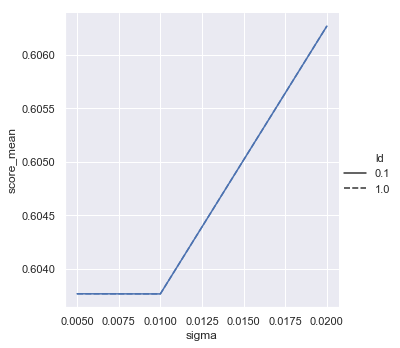

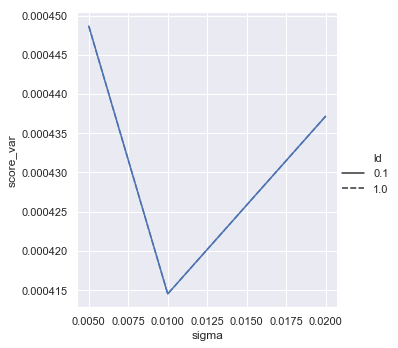

In [88]:
sns.set(style="darkgrid")
sns.relplot(x="sigma", y="score_mean", data=KLR_gs_2_df, style='ld', kind='line')
sns.relplot(x="sigma", y="score_var", data=KLR_gs_2_df, style='ld', kind='line')

In [36]:
my_klr_gs_2 = KLR(kernel = 'rbf', ld = 0.1, sigma = 0.1)
my_klr_gs_2.fit(X_subtr_2_mat, y_subtr_2['Bound'])
y_pred_klr_2 = my_klr_gs_2.predict(X_subtr_2_mat)
print('acc tr 2 (KLR):',np.mean(y_pred_klr_2 == y_subtr_2['Bound'].reset_index(drop = True)))
y_val_klr_2 = my_klr_gs_2.predict(X_val_2_mat)
print('acc val 2 (KLR):',np.mean(y_val_klr_2 == y_val_2['Bound'].reset_index(drop = True)))

100%|██████████████████████████████████████████████████████████████████████████████| 1600/1600 [00:22<00:00, 69.74it/s]


acc tr 2 (KLR): 0.574375


100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:05<00:00, 71.12it/s]


acc val 2 (KLR): 0.54


### KLR rbf test

### TF0

In [47]:
y_te_0_klr_mat = my_klr_gs_0.predict(X_te_0_mat)
y_te_0_klr_df=pd.DataFrame(y_te_0_klr_mat, columns=['Bound'])
y_te_0_klr_df.insert(loc=0,column='Id',value=X_tr_0['Id'])

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.20it/s]


### TF1

In [48]:
y_te_1_klr_mat = my_klr_gs_1.predict(X_te_1_mat)
y_te_1_klr_df=pd.DataFrame(y_te_1_klr_mat, columns=['Bound'])
y_te_1_klr_df.insert(loc=0,column='Id',value=X_tr_1['Id']-1000)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.80it/s]


### TF2

In [49]:
y_te_2_klr_mat = my_klr_gs_2.predict(X_te_2_mat)
y_te_2_klr_df=pd.DataFrame(y_te_2_klr_mat, columns=['Bound'])
y_te_2_klr_df.insert(loc=0,column='Id',value=X_tr_1['Id'])

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.89it/s]


In [50]:
y_te_klr_df = pd.concat([y_te_0_klr_df,y_te_1_klr_df,y_te_2_klr_df])
y_te_klr_df['Bound'][y_te_klr_df['Bound']==-1] = 0

# Spectral kernel

## splitting original data

In [62]:
X_subtr_0,X_val_0,y_subtr_0,y_val_0=split(X_tr_0,y_tr_0,0.2)
X_subtr_1,X_val_1,y_subtr_1,y_val_1=split(X_tr_1,y_tr_1,0.2)
X_subtr_2,X_val_2,y_subtr_2,y_val_2=split(X_tr_2,y_tr_2,0.2)

## SVM spectral kernel

### Grid Search TF0

In [63]:
#subset of training set (25%)
ratio = 0.25
n = X_subtr_0.shape[0]
X_subtr_0_sub = X_subtr_0.reset_index(drop=True).iloc[:int(n*ratio)]
y_subtr_0_sub = y_subtr_0.reset_index(drop=True).iloc[:int(n*ratio)]

In [67]:
svm_string_gs = svm(kernel='spectral', ld=1e-3)
svm_string_gs_res = svm_string_gs.grid_search(params={'k':[5,6,7]}, X=X_subtr_0_sub['seq'], y=y_subtr_0_sub['Bound'], cv=3)

100%|████████████████████████████████████████████████████████████████████████████████| 133/133 [13:15<00:00,  6.21s/it]


In [68]:
svm_string_gs_res_df = svm_string_gs_res[1]
svm_string_gs_res_top = svm_string_gs_res[0]

In [69]:
svm_string_gs_res_top

{'k': 7, 'top_score': 0.5675195451314854}

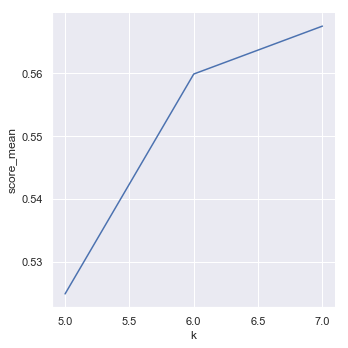

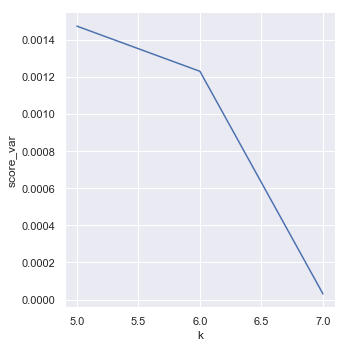

In [72]:
sns.set(style = "darkgrid")
sns.relplot(x = "k", y = "score_mean", data = svm_string_gs_res_df, kind = 'line')
sns.relplot(x = "k", y = "score_var", data = svm_string_gs_res_df, kind = 'line')

### TF0

In [27]:
from svm import svm
svm_string=svm(kernel='spectral',k=6, ld=1e-3)

In [28]:
svm_string.fit(X_subtr_0['seq'],y_subtr_0['Bound'])

100%|████████████████████████████████████████████████████████████████████████████| 1600/1600 [1:45:10<00:00,  9.26s/it]


In [29]:
np.shape(svm_string.alpha)

(1553, 1)

In [25]:
y_pred=svm_string.predict(X_subtr_0['seq'])
np.mean(y_pred==y_subtr_0['Bound'].reset_index(drop=True))

100%|████████████████████████████████████████████████████████████████████████████| 1600/1600 [4:25:53<00:00,  7.28s/it]


0.86875

In [30]:
y_pred_val=svm_string.predict(X_val_0['seq'])
np.mean(y_pred_val==y_val_0['Bound'].reset_index(drop=True))

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [59:52<00:00,  8.74s/it]


0.63

### TF0 test

In [29]:
from svm import svm
svm_string_0 = svm(kernel='spectral', k=7, ld=1e-3)
svm_string_0.fit(X_tr_0['seq'],y_tr_0['Bound'])
y_te_0_spec = svm_string_0.predict(X_te_0['seq'])
y_te_0_spec_df=pd.DataFrame(y_te_0_spec, columns=['Bound'])
y_te_0_spec_df.insert(loc=0,column='Id',value=X_tr_0['Id'])

 88%|█████████████████████████████████████████████████████████████████▏        | 1763/2000 [8:57:54<2:12:06, 33.45s/it]

KeyboardInterrupt: 

### TF1 train

In [ ]:
svm_string_1 = svm(kernel='spectral',k=7, ld=1e-3)
svm_string_1.fit(X_tr_1['seq'],y_tr_1['Bound'])

### TF1 test

In [ ]:
y_te_1_spec = svm_string_1.predict(X_te_1['seq'])
y_te_1_spec_df=pd.DataFrame(y_te_1_spec, columns=['Bound'])
y_te_1_spec_df.insert(loc=0,column='Id',value=X_tr_1['Id']-1000)

### TF2 train

In [ ]:
svm_string_2 = svm(kernel='spectral', k=7, ld=1e-3)
svm_string_2.fit(X_tr_2['seq'],y_tr_2['Bound'])

### TF2 test

In [ ]:
y_te_2_spec = svm_string_2.predict(X_te_2['seq'])
y_te_2_spec_df=pd.DataFrame(y_te_2_spec, columns=['Bound'])
y_te_2_spec_df.insert(loc=0,column='Id',value=X_tr_1['Id'])

### Concat results - spectrum

In [ ]:
y_te_spec_df = pd.concat([y_te_0_spec_df,y_te_1_spec_df,y_te_2_spec_df])
y_te_spec_df['Bound'][y_te_spec_df['Bound']==-1] = 0
y_te_spec_df.to_csv('y_svm_spectrum_k=7.csv',index=False)

Accuracy k=6 ld=1e-3 Nystrom=False 0.66200

Accuracy k=7 ld=1e-3 Nystrom=False takes too long time ( 3 days maybe)

## KLR spectrum

In [73]:
klr_string_gs = KLR(kernel='spectral', ld=0.1)
klr_string_gs_res = klr_string_gs.grid_search(params={'k':[5,6,7]}, X=X_subtr_0_sub['seq'], y=y_subtr_0_sub['Bound'], cv=3)

100%|████████████████████████████████████████████████████████████████████████████████| 133/133 [11:02<00:00,  4.97s/it]


In [74]:
klr_string_gs_res_df = klr_string_gs_res[1]
klr_string_gs_res_top = klr_string_gs_res[0]

In [75]:
klr_string_gs_res_top

{'k': 6, 'top_score': 0.5548572924849436}

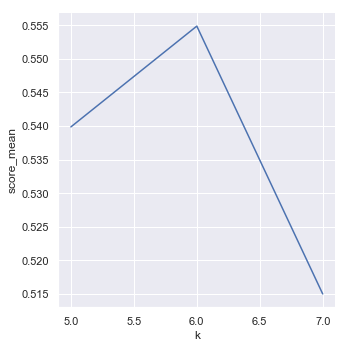

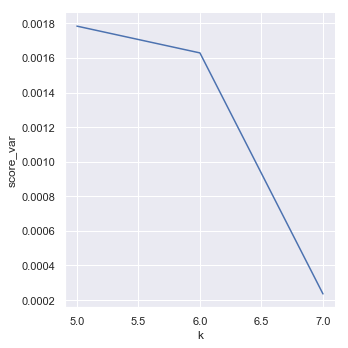

In [76]:
sns.set(style = "darkgrid")
sns.relplot(x = "k", y = "score_mean", data = klr_string_gs_res_df, kind = 'line')
sns.relplot(x = "k", y = "score_var", data = klr_string_gs_res_df, kind = 'line')

## KNN spectrum

kn=5, k=4 or k=5 , acc val 0.5175

In [78]:
from KNN import kknn
kknn_string_gs = kknn(kernel='spectral')
kknn_string_gs_res = kknn_string_gs.grid_search(params={'k':[5,6,7], 'kn':[5,7]}, X=X_subtr_0_sub['seq'], y=y_subtr_0_sub['Bound'], cv=3)

100%|████████████████████████████████████████████████████████████████████████████████| 133/133 [00:11<00:00, 11.13it/s]


In [79]:
kknn_string_gs_res_df = kknn_string_gs_res[1]
kknn_string_gs_res_top = kknn_string_gs_res[0]

In [80]:
kknn_string_gs_res_top

{'k': 5, 'top_score': 0.514887966184117}

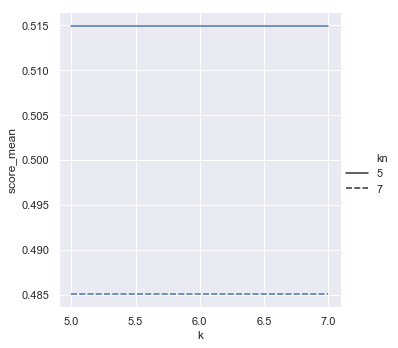

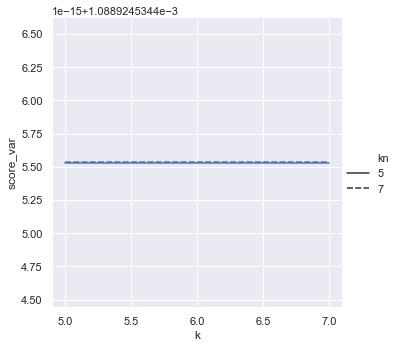

In [81]:
sns.set(style = "darkgrid")
sns.relplot(x = "k", y = "score_mean", data = kknn_string_gs_res_df, style='kn', kind = 'line')
sns.relplot(x = "k", y = "score_var", data = kknn_string_gs_res_df, style='kn', kind = 'line')

## SVM LA kernel

In [41]:
svm_la=svm(kernel='LA', ld=1e-3, beta=0.2, Nystrom=True) #cg=1, d=1, e=11, beta=0.1

In [42]:
svm_la.fit(X_subtr_0['seq'],y_subtr_0['Bound'])

In [43]:
np.shape(svm_la.sv)

(1600,)

In [44]:
y_pred_val_la_0=svm_la.predict(X_val_0['seq'])
print('acc svm la 0 (val):',np.mean(y_pred_val_la_0==y_val_0['Bound'].reset_index(drop=True)))


 34%|████████████████████████▉                                                 | 135/400 [4:59:21<11:52:13, 161.26s/it]


 68%|██████████████████████████████████████████████████▏                       | 271/400 [10:53:53<6:00:36, 167.72s/it]


100%|████████████████████████████████████████████████████████████████████████████| 400/400 [15:04:56<00:00, 102.99s/it]


acc svm la 0 (val): 0.4825


## SVM with mismatch kernel

for subA =7 mis= 1  => predict takes 54h, fitting took 26h

In [22]:
#subset of training set (40%)
ratio = 0.25
n = X_subtr_0.shape[0]
X_subtr_0_sub = X_subtr_0.reset_index(drop=True).iloc[:int(n*ratio)]
y_subtr_0_sub = y_subtr_0.reset_index(drop=True).iloc[:int(n*ratio)]

In [28]:
from svm import svm
svm_mismatch_gs_2 = svm(kernel="mismatch", ld=1e-3, mis=1)
res_gs_mismatch_2 = svm_mismatch_gs_2.grid_search(params = {'subA':[7,8,9]},
                                              X = X_subtr_0_sub['seq'],
                                              y = y_subtr_0_sub['Bound'],
                                              cv=3
                                             )

ACGT 7


100%|████████████████████████████████████████████████████████████████████████████████| 133/133 [01:20<00:00,  1.64it/s]


ACGT 8


KeyboardInterrupt: 

In [24]:
res_gs_mismatch_2_df=res_gs_mismatch_2[1]
res_gs_mismatch_2_best=res_gs_mismatch_2[0]

In [25]:
res_gs_mismatch_2_best

{'subA': 8, 'top_score': 0.5574944824748438}

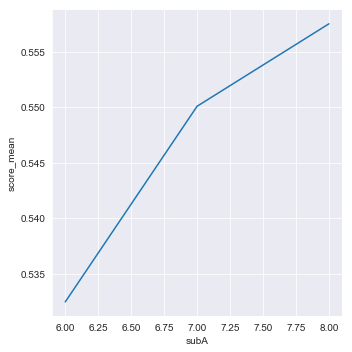

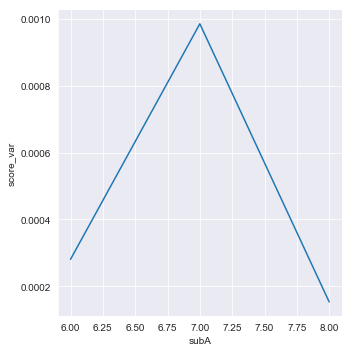

In [27]:
sns.relplot(x="subA", y="score_mean", data=res_gs_mismatch_2_df, kind='line')
sns.relplot(x="subA", y="score_var", data=res_gs_mismatch_2_df, kind='line')

best score after grid search with subA=8 (mis=1,ld=1e-3): 0.5574

In [22]:
from svm import svm
svm_mismatch = svm(kernel="mismatch", ld=1e-3, subA=8, mis=1)

In [23]:
##TF0
svm_mismatch.fit(X_tr_0['seq'],y_tr_0['Bound'])
y_te_0_mis = svm_mismatch.predict(X_te_0['seq'])
y_te_0_mis_df=pd.DataFrame(y_te_0_mis, columns=['Bound'])
y_te_0_mis_df.insert(loc=0,column='Id',value=X_tr_0['Id'])

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [2:22:39<00:00,  7.98s/it]


In [24]:
##TF1
svm_mismatch.fit(X_tr_1['seq'],y_tr_1['Bound'])
y_te_1_mis = svm_mismatch.predict(X_te_1['seq'])
y_te_1_mis_df=pd.DataFrame(y_te_1_mis, columns=['Bound'])
y_te_1_mis_df.insert(loc=0,column='Id',value=X_tr_1['Id']-1000)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [2:12:53<00:00,  7.85s/it]


In [25]:
##TF2
svm_mismatch.fit(X_tr_2['seq'],y_tr_2['Bound'])
y_te_2_mis = svm_mismatch.predict(X_te_2['seq'])
y_te_2_mis_df=pd.DataFrame(y_te_2_mis, columns=['Bound'])
y_te_2_mis_df.insert(loc=0,column='Id',value=X_tr_1['Id'])

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [2:01:27<00:00,  7.28s/it]


In [26]:
#submit
y_te_mis_df = pd.concat([y_te_0_mis_df,y_te_1_mis_df,y_te_2_mis_df])
y_te_mis_df['Bound'][y_te_mis_df['Bound']==-1] = 0
y_te_mis_df.to_csv('y_svm_mismatch_sub=8_mis=1.csv',index=False)

mis=1 sub=8 ld=1e-3 score=0.666

sub=10 mis =1 took nearly 12h to compute neighbours (and didn't finish) => aborted

## Bagging SVM spectral kernel

In [19]:
from bagging import *
from svm import svm
svm_spec = svm(kernel="spectral", ld=1e-3, k=6)

#TF0

y_te_0_spec = bagging(X_tr_0['seq'], y_tr_0['Bound'], X_te_0['seq'], 0.9, 3, svm_spec)
y_te_0_spec_df = pd.DataFrame(y_te_0_spec, columns=['Bound'])
y_te_0_spec_df.insert(loc=0,column='Id',value=X_tr_0['Id'])

#TF1

y_te_1_spec = bagging(X_tr_1['seq'],y_tr_1['Bound'],X_te_1['seq'], 0.9, 3, svm_spec)
y_te_1_spec_df = pd.DataFrame(y_te_1_spec, columns=['Bound'])
y_te_1_spec_df.insert(loc=0,column='Id',value=X_tr_1['Id']-1000)

#TF2

y_te_2_spec = bagging(X_tr_2['seq'],y_tr_2['Bound'],X_te_2['seq'], 0.9, 3, svm_spec)
y_te_2_spec_df = pd.DataFrame(y_te_2_spec, columns=['Bound'])
y_te_2_spec_df.insert(loc=0,column='Id',value=X_tr_1['Id'])

#concat

y_te_spec_df = pd.concat([y_te_0_spec_df,y_te_1_spec_df,y_te_2_spec_df])
y_te_spec_df['Bound'][y_te_spec_df['Bound']==-1] = 0
y_te_spec_df.to_csv('y_svm_spectrum_bag_k=6.csv',index=False)

  6%|████▌                                                                          | 103/1800 [00:28<15:24,  1.84it/s]

KeyboardInterrupt: 